# Análise de Séries Temporais

### O que é uma série temporal (time series)?
**Conceito:** Uma série temporal é um conjunto de observações coletadas sequencialmente ao longo do tmepo em intervalores regulares(horas, dias, meses, anos). Exemplos: Distribuição da conta de luz ao longo do tempo, preço das ações na bolsa de valores, variação de temperatura ao longo do dia, vendas mensais de uma empresa, casos de uma certa doença, etc.

### Por que aprender sobre time series?
Existem muitas aplicações que são dependentes da análise de séries temporais. No geral, usamos time series para:
* Análise de modelagem: o que é a série? Quais características mais relevantes? Qual a correlação dessa série com outras? Exemplo: Existe uma relação entre temperatura e gripe?
* Previsão: Prever os próximos valores, a partir dos valores históricos da série temporal. Exemplo: Previsão de vendas, previsão de ações, previsão de atributos de tempo, etc..

**Uma série temporal não é um dado comum:** Um algoritmo tradicional de machine learning como uma regressão linear não consegue resolver bem problemas de previsão de séries temporais, pois são projetados para modelagem de variáveis independetes do tempo. Há uma série de algoritmos estatísticos para previsão de séries temporais, por exemplo: ARIMA.

### Como analisar uma série temporal?
A maneira tradicional de analisar uma série temporal é através da sua decomposição nas componentes de tendência, ciclo e sazonalidade.
* __Tendência:__ Indica o comportamento de "longo prazo" e velocidade que elas ocorrem: Se a serie cresce, descreve ou se permanece estável. Exemplo: A ação X está com tendência de alta! Se cresce linear, quadrática?
* __Sazonalidade:__ Indica como variações repetitivas e periódicas ocorrem numa série temporal. Há padrões que ocorrem durante o tempo que se repete a cada período idêntico de tempo (como anos, meses e semanas).
* __Tendência e Sazonalidade:__ Pode ocorrer uma série que tenha tanto tendência de alta ou baixa, quanto a sazonalidade de se repetir a cada ciclo.
* __Estacionariedade:__ Indica se uma série tem um comportamento aleatório ao longo do tempo ou não. Uma série é estacionária se seus valores para média, variância e covariância permanece constantes ao longo do da dimensão espacial. Uma série não temporal não possui nenhum tipo de tendência e/ou sazionalidade.
* __Autocorrelação:__ Indica o valor de correlação durante o intervalo de tempo que foi cálculado. Exemplo: Entre o preço da ação da PETR4 e VALE3 durante um ano?


### Prática

In [1]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
import seaborn as sns

In [2]:
#!pip install yfinance

#### Aquisição dos dados

In [3]:
ticket = yf.Ticker('PETR4.SA')
#df = ticket.history(period='3y', interval='1mo')
df = ticket.history(interval='1d', start='2018-01-01', end='2022-03-10')

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,12.207731,12.479180,12.207731,12.479180,33461800,0.0,0
2018-01-03,12.433940,12.607367,12.343458,12.592287,55940900,0.0,0
2018-01-04,12.652611,12.788335,12.531966,12.614908,37064900,0.0,0
2018-01-05,12.592287,12.712932,12.494263,12.690310,26958200,0.0,0
2018-01-08,12.622448,12.841117,12.599826,12.841117,28400000,0.0,0


In [5]:
df.shape

(1035, 7)

<AxesSubplot:xlabel='Date'>

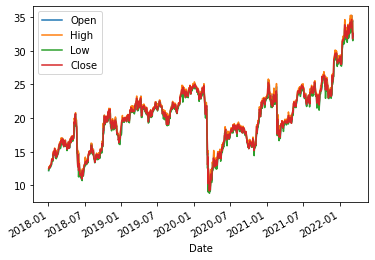

In [6]:
df[['Open', 'High', 'Low', 'Close']].plot()

Uma primeira plotagem bem simples para ter uma visualização inicial da nossa série.

#### 2. Decomposição de uma série temporal
* Additive Model: y(t) = Level + Trend + Seasonality + Noise
* Multiplicative Model: y(t) = Level * Trend * Seasonality * Noise

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2018-01-02 to 2022-03-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1035 non-null   float64
 1   High          1035 non-null   float64
 2   Low           1035 non-null   float64
 3   Close         1035 non-null   float64
 4   Volume        1035 non-null   int64  
 5   Dividends     1035 non-null   float64
 6   Stock Splits  1035 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 64.7 KB


Com excessão dos atributos Volume e Stock Splits que são inteiros, todos os outros são do tipo float.

In [8]:
df.index[0], df.index[-1]

(Timestamp('2018-01-02 00:00:00'), Timestamp('2022-03-09 00:00:00'))

O índice deste dataset utiliza intervalo de datas.

In [9]:
decomposicao = seasonal_decompose(df[['Close']], period=50, extrapolate_trend=50)

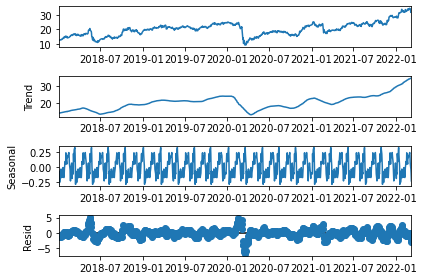

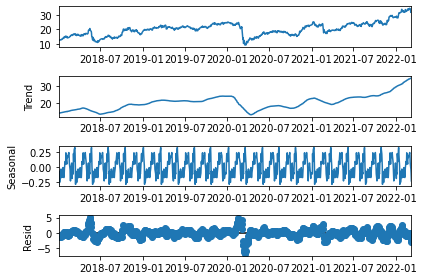

In [10]:
decomposicao.plot()

Com a decomposição dos dados no atributo 'Close' é possível obter várias informações a respeito da série temporal, informações como tendência, sazonalidade e resíduos. Com isso já obter alguns insights. 

<AxesSubplot:xlabel='Date'>

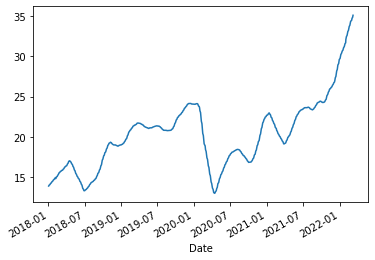

In [11]:
decomposicao.trend.plot()

É possível perceber que o valor das ações estão em alta no atual mês (mar/2022). Os valores das ações estão diretamente relacionadas com os acontecimentos sociais, políticos e econômicosdo Brasil e do Mundo. <br/>
Atualmente está acontecendo a invasão da Rússia na Ucrânia e as sansões aplicadas a Rússia afetarem diretamente o preço dos combustíveis fósseis pelo mundo. Portanto o preço do barril do petróleo fez as ações da Petrobras crescerem bastante nas últimas semanas.

<AxesSubplot:xlabel='Date'>

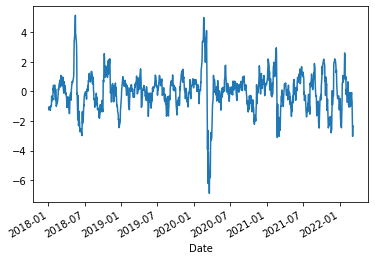

In [12]:
decomposicao.resid.plot()

Pelos resíduos nesse período podemos perceber que em dois momentos ouve bastante variação na série temporal.
* Final de 2018: Ouve a eleição do Bolsonaro, um partido de direita, e havia expectativa por parte dos investidores de sobre uma política mais liberal por parte do governo, por isso o aumento.
* No começo de 2020: Ouve o surgimento do COVID 19 fazendo com que praticamente o mundo inteiro entrasse em quarentena, e como isso os investidores retiraram seus investimentos de ativos tão arriscados, por isso a queda histórica no preço das ações.

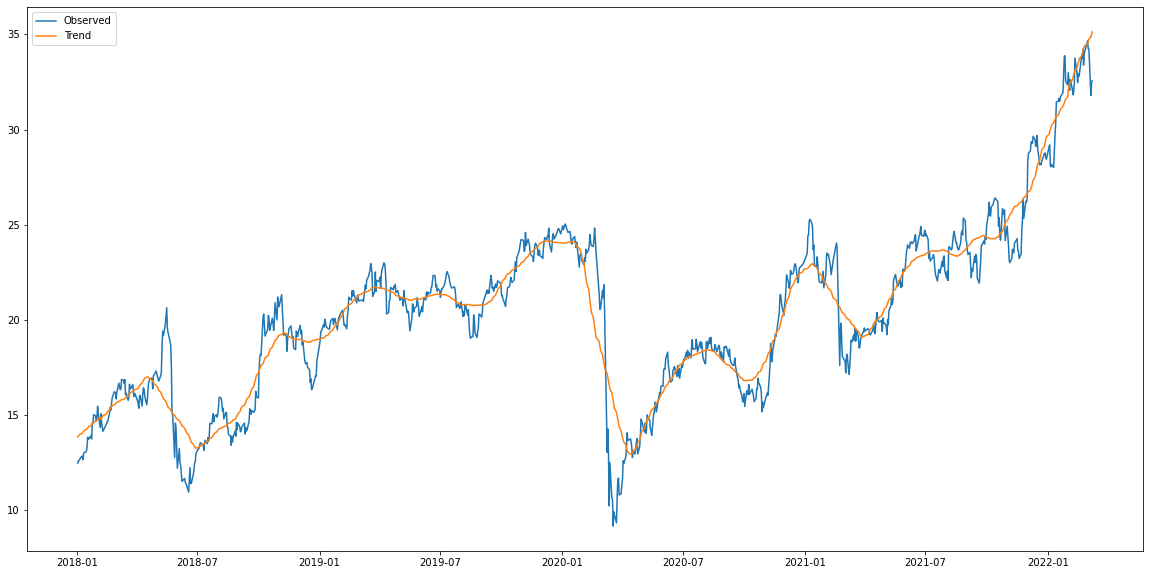

In [13]:
ax, fig = plt.subplots(figsize=(20,10))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)
plt.legend(['Observed', 'Trend'])

Exibindo uma comparação entre o dado real e traçando um linha de tendência.

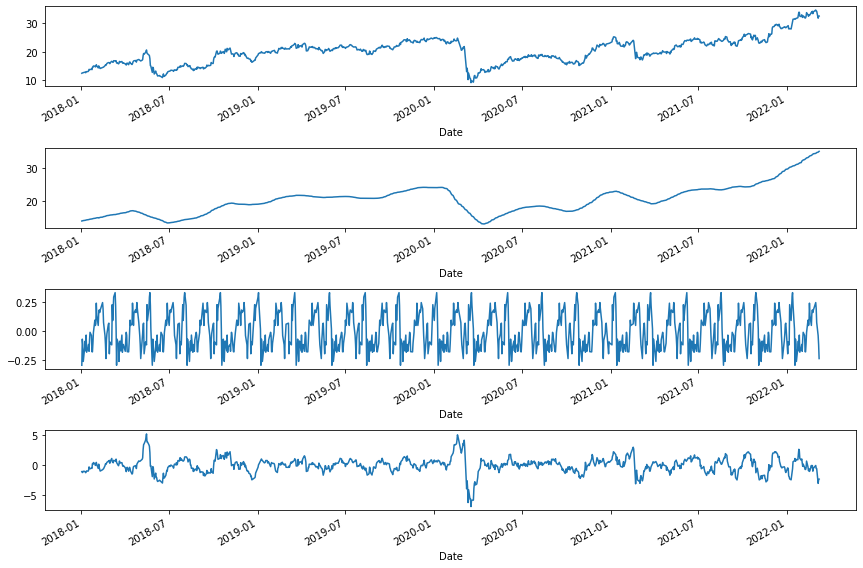

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,8))
decomposicao.observed.plot(ax = ax1)
decomposicao.trend.plot(ax = ax2)
decomposicao.seasonal.plot(ax = ax3)
decomposicao.resid.plot(ax = ax4)
plt.tight_layout()

### 3. Cálculo da média móvel

In [15]:
media_movel7d = df['Close'].rolling(7).mean()
media_movel14d = df['Close'].rolling(14).mean()
media_movel21d = df['Close'].rolling(21).mean()

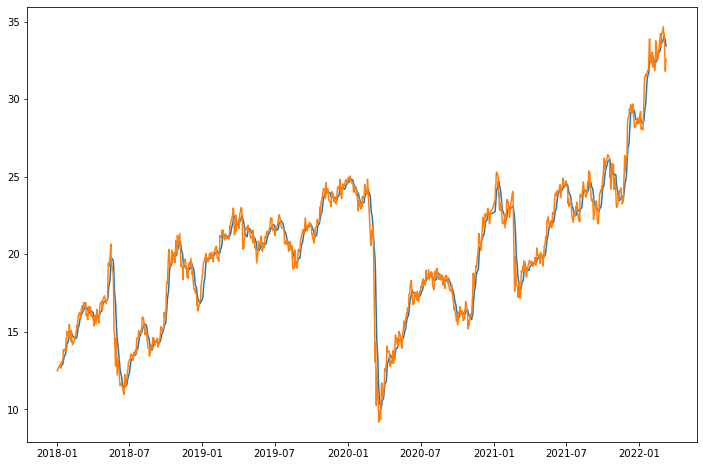

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(media_movel7d)
#plt.plot(media_movel14d)
#plt.plot(media_movel21d)
plt.plot(df['Close'])

Exibindo a média móvel do fechamento no intervalo de 7 dias.

### 4. Extração de features
Somente a série temporal às vezes não nos dá muitas informações relevantes. Precisamos correlacionar os dados, por exemplo: Pegar dados de temperatura com dados de gripe e analisar se há correlação.

In [17]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,12.207731,12.479180,12.207731,12.479180,33461800,0.0,0
2018-01-03,12.433940,12.607367,12.343458,12.592287,55940900,0.0,0
2018-01-04,12.652611,12.788335,12.531966,12.614908,37064900,0.0,0
2018-01-05,12.592287,12.712932,12.494263,12.690310,26958200,0.0,0
2018-01-08,12.622448,12.841117,12.599826,12.841117,28400000,0.0,0


In [18]:
df.reset_index(inplace=True)

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-01-02,12.207731,12.479180,12.207731,12.479180,33461800,0.0,0
1,2018-01-03,12.433940,12.607367,12.343458,12.592287,55940900,0.0,0
2,2018-01-04,12.652611,12.788335,12.531966,12.614908,37064900,0.0,0
3,2018-01-05,12.592287,12.712932,12.494263,12.690310,26958200,0.0,0
4,2018-01-08,12.622448,12.841117,12.599826,12.841117,28400000,0.0,0


Nesse exemplo estarei extraindo a rentabilidade como uma features da minha serie tempora e também vou estar pegando o atributo Date

In [20]:
#Criando features para cada período
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [21]:
#Rentabilidade é preço atual/ preço anterior * 100 - 100
df[['rentabilidade']] = df[['Close']] / df[['Close']].shift() * 100 - 100

In [22]:
df[['rentabilidade']]

,rentabilidade
0,NaN
1,0.906363
2,0.179643
3,0.597723
4,1.188359
...,...
1030,-1.240255
1031,-0.029212
1032,-7.099037
1033,2.075471


In [23]:
def features_extraction(df_):
    #Criando features para cada período
    df_['year'] = df_['Date'].dt.year
    df_['month'] = df_['Date'].dt.month
    df_['day'] = df_['Date'].dt.day
    #Rentabilidade é preço atual/ preço anterior * 100 - 100
    df_[['rentabilidade']] = df_[['Close']] / df_[['Close']].shift() * 100 - 100
    
    mesesNomes = {
        1: 'janeiro',
        2: 'fevereiro',
        3: 'marco',
        4: 'abril',
        5: 'maio',
        6: 'junho',
        7: 'julho',
        8: 'agosto',
        9: 'setembro',
        10: 'outubro',
        11: 'novembro',
        12: 'dezembro'
    }

    df_['mesesNomes'] = df['month'].map(mesesNomes)

In [24]:
df.reset_index(inplace=True)
features_extraction(df)

In [25]:
df

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade,mesesNomes
0,0,2018-01-02,12.207731,12.479180,12.207731,12.479180,33461800,0.0,0,2018,1,2,NaN,janeiro
1,1,2018-01-03,12.433940,12.607367,12.343458,12.592287,55940900,0.0,0,2018,1,3,0.906363,janeiro
2,2,2018-01-04,12.652611,12.788335,12.531966,12.614908,37064900,0.0,0,2018,1,4,0.179643,janeiro
3,3,2018-01-05,12.592287,12.712932,12.494263,12.690310,26958200,0.0,0,2018,1,5,0.597723,janeiro
4,4,2018-01-08,12.622448,12.841117,12.599826,12.841117,28400000,0.0,0,2018,1,8,1.188359,janeiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1030,2022-03-03,34.820000,34.930000,34.160000,34.240002,69237400,0.0,0,2022,3,3,-1.240255,marco
1031,1031,2022-03-04,34.080002,34.680000,33.820000,34.230000,55418000,0.0,0,2022,3,4,-0.029212,marco
1032,1032,2022-03-07,34.500000,34.599998,31.629999,31.799999,110954100,0.0,0,2022,3,7,-7.099037,marco
1033,1033,2022-03-08,32.000000,32.970001,31.510000,32.459999,111633500,0.0,0,2022,3,8,2.075471,marco


### Gerando Questões

#### 1) Existe um melhor período para investir no ativo?
* Considerando 3 anos de dados de rentabilidade, o agrupamento mostra que os meses de janeiro, abril e outubro são mais interessantes para investir.

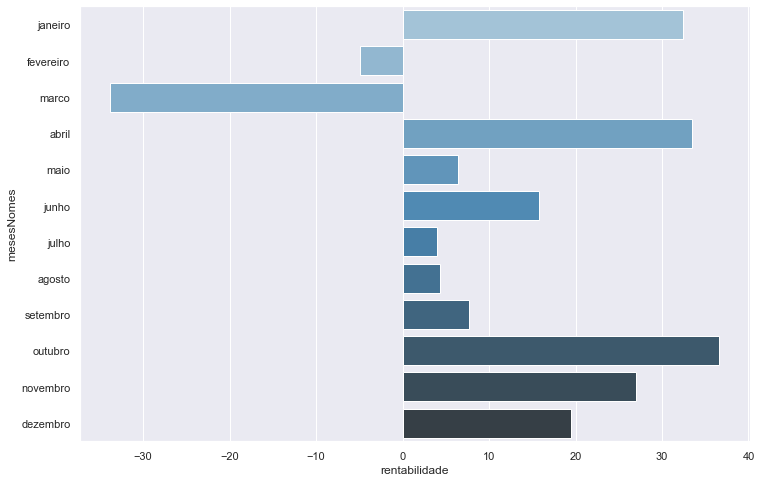

In [26]:
graphRent = df.groupby(['mesesNomes', 'month']).agg({'rentabilidade': 'sum'}).sort_values('month')
graphRent.reset_index(inplace=True)
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y=graphRent['mesesNomes'], x=graphRent['rentabilidade'], data=graphRent, palette="Blues_d")

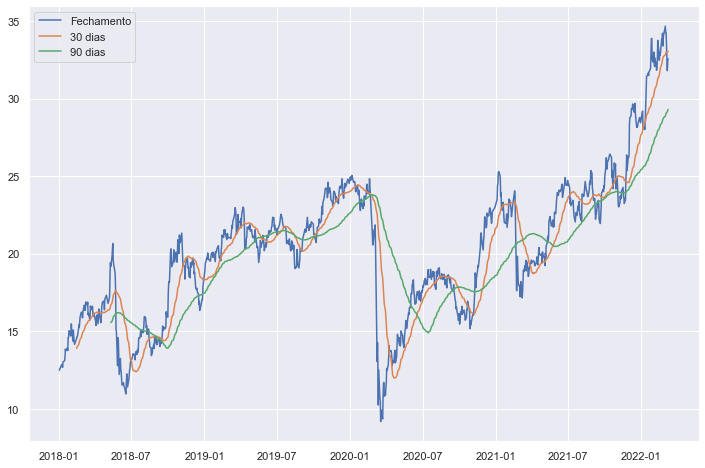

In [27]:
df.set_index('Date', inplace=True)
media_movel30d = df['Close'].rolling(30).mean()
media_movel90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(df['Close'])
plt.plot(media_movel30d)
plt.plot(media_movel90d)
plt.legend(['Fechamento', '30 dias', '90 dias'])

Exibindo um gráfico com a média móvel dos últimos 30 dias e também 90 dias.

#### 2) Existe um melhor dia para investir no ativo?

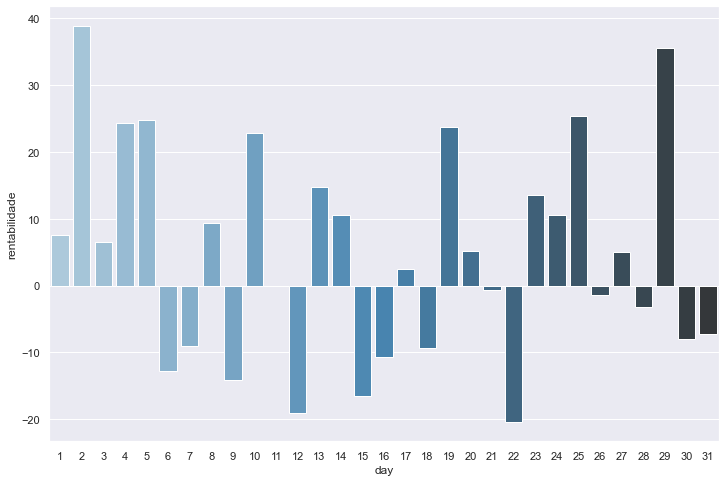

In [28]:
graphRent = df.groupby(['day']).agg({'rentabilidade': 'sum'}).sort_values('day')
graphRent.reset_index(inplace=True)
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(y=graphRent['rentabilidade'], x=graphRent['day'], data=graphRent, palette="Blues_d")

Nota-se que em alguns dias do mês há uma alta na rentabilidade enquanto que em outros há baixas na rentabilidade.

#### 3) Qual é a rentabilidade da Petrobras no período do dataset?

In [29]:
df.rentabilidade.sum()

148.51240692487625

In [30]:
df['Close'].iloc[-1] - df['Close'].iloc[0]

20.08082103729248

Do dia 02 de janeiro de 2018 até o dia 09 de março de 2022 as ações da Petrobras valorizaram R$20,08.

### Correlações de séries temporais

In [31]:
tickets = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', 'BBAS3.SA']
dfs = []
for t in tickets:
    print('Reading ticker {}....'.format(t))
    ticket = yf.Ticker(t)
    aux = ticket.history(interval='1d', start='2018-01-01', end='2022-03-09')
    aux.reset_index(inplace=True)
    aux['ticket'] = t
    dfs.append(aux)

Reading ticker VALE3.SA....
Reading ticker ITUB4.SA....
Reading ticker PETR4.SA....
Reading ticker ABEV3.SA....
Reading ticker BBDC4.SA....
Reading ticker BBAS3.SA....


In [32]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2018-01-02,29.755307,30.711835,29.755307,30.697119,14156500.0,0.00000,0,VALE3.SA
1,2018-01-03,30.778059,30.814847,30.388088,30.513174,12744200.0,0.00000,0,VALE3.SA
2,2018-01-04,30.763347,31.175388,30.549968,30.638262,18433000.0,0.00000,0,VALE3.SA
3,2018-01-05,30.586751,31.116520,30.395447,31.116520,15251300.0,0.00000,0,VALE3.SA
4,2018-01-08,31.197461,31.808165,31.197461,31.808165,14542800.0,0.00000,0,VALE3.SA
...,...,...,...,...,...,...,...,...,...
1030,2022-03-03,96.507737,97.528682,95.833534,96.026161,38621400.0,0.00000,0,VALE3.SA
1031,2022-03-04,95.043749,98.328090,94.504387,98.212517,30533200.0,0.00000,0,VALE3.SA
1032,2022-03-07,100.591505,101.997705,100.042510,101.198288,55305300.0,0.00000,0,VALE3.SA
1033,2022-03-08,103.047531,103.163112,96.045426,96.758156,53060200.0,0.00000,0,VALE3.SA


In [33]:
for d in dfs:
    features_extraction(d)

In [34]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,rentabilidade,mesesNomes
0,2018-01-02,29.755307,30.711835,29.755307,30.697119,14156500.0,0.00000,0,VALE3.SA,2018,1,2,NaN,NaN
1,2018-01-03,30.778059,30.814847,30.388088,30.513174,12744200.0,0.00000,0,VALE3.SA,2018,1,3,-0.599225,NaN
2,2018-01-04,30.763347,31.175388,30.549968,30.638262,18433000.0,0.00000,0,VALE3.SA,2018,1,4,0.409947,NaN
3,2018-01-05,30.586751,31.116520,30.395447,31.116520,15251300.0,0.00000,0,VALE3.SA,2018,1,5,1.560983,NaN
4,2018-01-08,31.197461,31.808165,31.197461,31.808165,14542800.0,0.00000,0,VALE3.SA,2018,1,8,2.222757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,2022-03-03,96.507737,97.528682,95.833534,96.026161,38621400.0,0.00000,0,VALE3.SA,2022,3,3,0.050167,NaN
1031,2022-03-04,95.043749,98.328090,94.504387,98.212517,30533200.0,0.00000,0,VALE3.SA,2022,3,4,2.276833,NaN
1032,2022-03-07,100.591505,101.997705,100.042510,101.198288,55305300.0,0.00000,0,VALE3.SA,2022,3,7,3.040113,NaN
1033,2022-03-08,103.047531,103.163112,96.045426,96.758156,53060200.0,0.00000,0,VALE3.SA,2022,3,8,-4.387557,NaN


In [35]:
correlacao = pd.DataFrame()
for d in dfs:
    correlacao[d['ticket'].iloc[0]] = d['rentabilidade']

In [36]:
correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,BBAS3.SA
VALE3.SA,1.000000,0.357273,0.465210,0.226169,0.374645,0.399065
ITUB4.SA,0.357273,1.000000,0.575636,0.493174,0.727658,0.776312
PETR4.SA,0.465210,0.575636,1.000000,0.408117,0.558709,0.673064
ABEV3.SA,0.226169,0.493174,0.408117,1.000000,0.433438,0.457950
BBDC4.SA,0.374645,0.727658,0.558709,0.433438,1.000000,0.736393
BBAS3.SA,0.399065,0.776312,0.673064,0.457950,0.736393,1.000000


<AxesSubplot:>

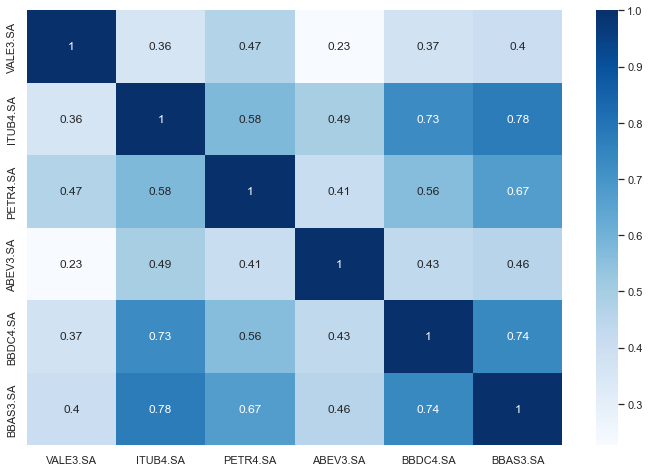

In [37]:
sns.heatmap(correlacao.corr(), cmap="Blues", annot=True)

In [38]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [39]:
#!pip install plotly

In [40]:
def plot_lines(df_, columns=['Open', 'Close', 'High', 'Low']):
    fig = go.Figure()
    for c in columns:
        fig.add_trace(go.Scatter(x = list(df_.index), y = df_[c], mode = 'markers+lines', name = c))

    return fig

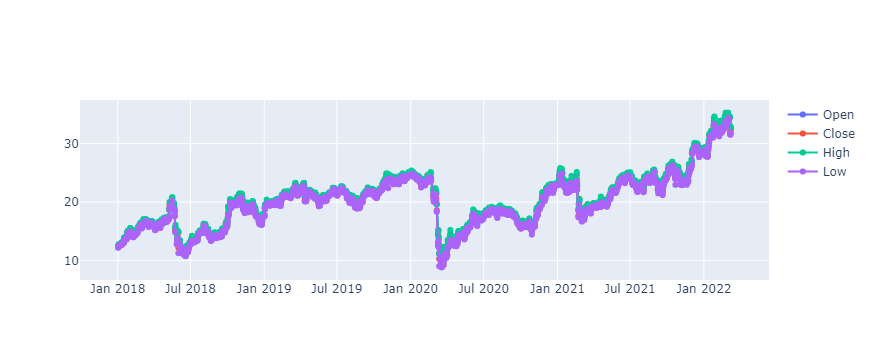

In [41]:
plot_lines(df)

In [43]:
#df.set_index('Date', inplace=True)
def plotCandleStick(df, acao='ticket'):
    trace1 = {
        'x': df.index,
        'open': df.Open,
        'close': df.Close,
        'high': df.High,
        'low': df.Low,
        'type': 'candlestick',
        'name': acao,
        'showlegend': False
    }
    
    data = [trace1]
    layout = go.Layout()
    
    fig = go.Figure(data = data, layout = layout)
    return fig

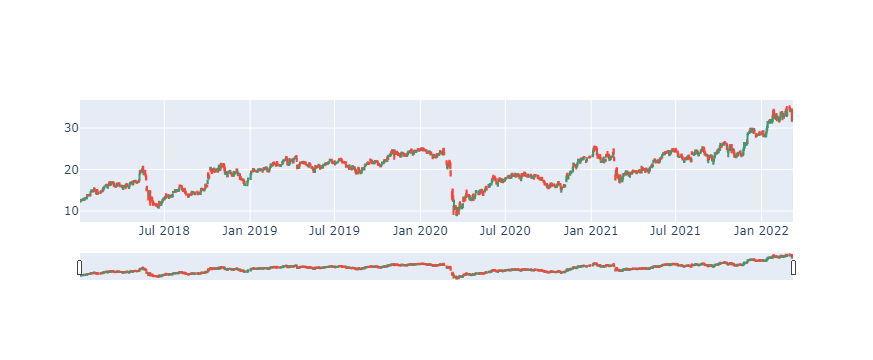

In [44]:
plotCandleStick(df)